In [22]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
import requests
from bs4 import BeautifulSoup
import json
import tweepy
import re
import seaborn as sns

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

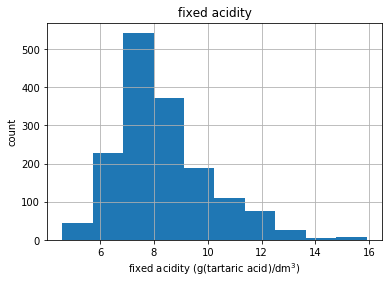

In [3]:
#LER CSV DA INTERNET

# Assign url of file:
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read directly from Web
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

In [5]:
#LER XSLS DA INTERNET

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


In [6]:
#LER PAGINA DA INTERNET

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# Sends the request and catches the response: response
response = urlopen(Request(url))

# Extract the response and Print the html
print(response.read())

# Be polite and close the response!
response.close()

#=== MAIS SIMPLES AINDA! ===#
# Packages the request, send the request and catch the response in one line!
r = requests.get(url)

# Extract the response: text
text = r.text

#=== TORNANDO O CÓDIGO LEGIVEL USANDO BEAUTIFULSOUP ===#
soup = BeautifulSoup(text, 'lxml')

pretty_soup = BeautifulSoup.prettify(soup)

# Print the html
print(pretty_soup)

#Pega todo o texto da página
page_text = BeautifulSoup.get_text(soup)
#Pega o título da página
page_title = soup.title

# Find all 'a' tags (which define hyperlinks) and print just the HREF
a_tags = soup.find_all('a')
for link in a_tags:
    print(link.get('href'))

b'\n<!DOCTYPE HTML>\n<html lang="" >\n    <head>\n        <meta charset="UTF-8">\n        <meta content="text/html; charset=utf-8" http-equiv="Content-Type">\n        <title>Welcome \xc2\xb7 Authoring Content for DataCamp</title>\n        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n        <meta name="description" content="">\n        <meta name="generator" content="GitBook 3.2.3">\n        \n        \n        \n    \n    <link rel="stylesheet" href="gitbook/style.css">\n\n    \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-bootstrap-callout/plugin.css">\n                \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-expandable-chapters/expandable-chapters.css">\n                \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-advanced-emoji/emoji-website.css">\n                \n            \n                \n  

<!DOCTYPE HTML>
<html lang="">
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Welcome · Authoring Content for DataCamp
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="" name="description"/>
  <meta content="GitBook 3.2.3" name="generator"/>
  <link href="gitbook/style.css" rel="stylesheet"/>
  <link href="gitbook/gitbook-plugin-bootstrap-callout/plugin.css" rel="stylesheet"/>
  <link href="gitbook/gitbook-plugin-expandable-chapters/expandable-chapters.css" rel="stylesheet"/>
  <link href="gitbook/gitbook-plugin-advanced-emoji/emoji-website.css" rel="stylesheet"/>
  <link href="gitbook/gitbook-plugin-codetabs/codetabs.css" rel="stylesheet"/>
  <link href="gitbook/gitbook-plugin-highlight/website.css" rel="stylesheet"/>
  <link href="gitbook/gitbook-plugin-search/search.css" rel="stylesheet"/>
  <link href="gitbook/gitbook-plugin-fontsettings/website.css" rel="stylesheet"/>
  <meta

In [8]:
#JSON e APIs

url_omdb='http://www.omdbapi.com/?apikey=ff21610b&t=social+network'

r_omdb = requests.get(url_omdb)
json_data_omdb = r_omdb.json()
for k in json_data_omdb.keys():
    print(k + ': ', json_data_omdb[k])
    
url_wiki = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'
r_wiki = requests.get(url_wiki)
json_data_wiki = r_wiki.json()
pizza_extract = json_data_wiki['query']['pages']['24768']['extract']
print(pizza_extract)

Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
BoxOffice:  $96,400,000
imdbVotes:  534,436
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Director:  David Fincher
Released:  01 Oct 2010
Language:  English, French
Type:  movie
imdbID:  tt1285016
Genre:  Biography, Drama
Response:  True
Country:  USA
Rated:  PG-13
Title:  The Social Network
imdbRating:  7.7
Production:  Columbia Pictures
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Website:  http://www.thesocialnetwork-movie.com/
Year:  2010
Runtime:  120 min
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
DVD:  11 Jan 2011
Poster:  https://imag

In [18]:
#APRENDENDO A UTILIZAR A API DO TWITTER

#DATACAMP TOKENS
# Store OAuth authentication credentials in relevant variables
#access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
#access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
#consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
#consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("data/tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

#MY TOKENS
# Store OAuth authentication credentials in relevant variables
access_token = '33519391-Xx7bcANZuVuGMsWOVR2AcYIiLTihb3eaHaz2yBqsZ'
access_token_secret = 'gcz1T2ETkNOEllV3yx77exRXBDtA4qYBq8iCwHD4nrcAX'
consumer_key = 'E6CWMpiTlqSuwyw94KE1RnHBo'
consumer_secret = 'ug79A95LJXTSRbNpZUJATIqfSgDtlEb3WAEdjy2SFWJzt7LUls'

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


l = MyStreamListener()
stream = tweepy.Stream(auth, l)
# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton','trump','sanders','cruz'])

# Initialize empty list to store tweets
tweets_data = []

# Open connection to file
with open('data/tweets.txt', "r") as tweets_file:
    # Read in tweets and store in list: tweets_data
    for line in tweets_file:
        tweet = json.loads(line)
        tweets_data.append(tweet)

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @Rschooley: How much damage do you think it...   en
1  RT @robreiner: After reading Jane Mayer’s piec...   en
2  RT @amirtibon: Three hours before his meeting ...   en
3  RT @RadiNabulsi: #UGA players waiting to do th...   en
4  RT @DailyGrail: Trump’s tweets make much more ...   en


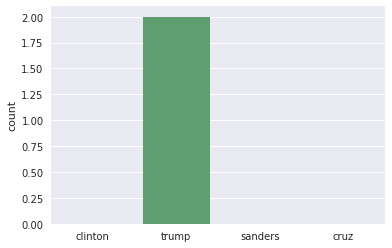

In [23]:
def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    return False

# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])
    
# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()